In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [3]:
def ccc_collect(ccc_id):
    url_head = f'https://register.codingcontest.org/contest/{ccc_id}/results?page.page='
    
    df_list = []
    i = 1
    while True:
        print(f'Collecting info from page {i}', end='\r')
        url = url_head + str(i)
        data = pd.read_html(url)[0]
        if data.empty:
            print(f'Finished collecting info from {i} page(s)', end='\r')
            break
        df_list.append(data)
        i += 1

    return pd.concat(df_list)


def ccc_location(ccc_id, host_dict):
    url_head = f'https://register.codingcontest.org/contest/{ccc_id}/results?hostId='
        
    df_list = []
    i = 0
    column_names = {}
    for host_id, host_name in host_dict.items():
        print(f'Collecting info from location {host_name:>10}')
        url = url_head + str(host_id)
        data = pd.read_html(url)[0]
        df_list.append(data['Levels completed'])
        column_names[i] = host_name
        i += 1
    print(f'Finished collecting info from {i-1} location(s)', end='\r')
    df = pd.concat(df_list, ignore_index=True, axis=1)
    return df.rename(columns=column_names)

In [4]:
host_dict = {1: "The Web - ONLINE",
            75: "Amsterdam - Vrije Universiteit Amsterdam}",
            4: "Amstetten - Die Remise",
            92: "Budapest - Prezi HQ",
            17: "Cairo - The German University in Cairo",
            29: "Chișinău - Technical University of Moldova",
            34: "Cluj-Napoca - FSEGA, UBB",
            35: "Craiova - University of Craiova",
            88: "Frankfurt am Main - Frankfurt UAS, Raum 4-109/110",
            85: "Friedberg - Technische Hochschule Mittelhessen",
            7: "Graz - IT Community Styria",
            21: "Gummersbach - Technische Hochschule Köln",
            36: "Iasi - Faculty of Computer Science, UIAC",
            64: "Kampala - Makerere Innovation and Incubation Center",
            19: "Lille - Université de Lille",
            5: "Linz - JKU",
            61: "Madrid - Facultad de Informática UCM",
            76: "New Orleans - DXC Technology",
            89: "Novi Sad - PanonIT",
            67: "Oradea - University of Oradea",
            16: "Pilsen - University of West Bohemia",
            83: "Pretoria - University of Pretoria",
            70: "Ried Im Innkreis - Cloudflight (former Catalysts)",
            53: "Rybnik - ALAN Systems",
            10: "Salzburg (classic) - Universität Salzburg",
            86: "St. Pölten - WIFI Niederösterreich",
            87: "Thalheim bei Wels - Fronius International GmbH",
            37: "Timisoara - West University of Timisora",
            54: "Valladolid - Escuela de Ingeniería Informática",
            6: "Vienna - Wiener Rathaus",
            32: "Warsaw - University of Warsaw",
            65: "Wattens - Swarovski",
            71: "Wrocław - University of Wrocław",
            }

/home/manuel/anaconda3/lib/python3.7/site-packages/html5lib/_trie/_base.py:3: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Mapping


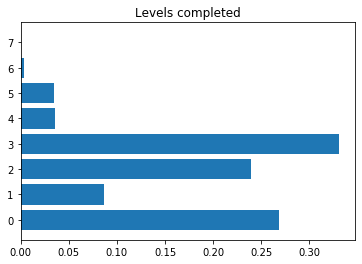

In [5]:
df = ccc_collect(2908)
df.hist(column='Levels completed', grid=False, bins=np.arange(-0.5, 8.5, 1), rwidth=0.8, orientation='horizontal', density=True)
plt.show()

In [6]:
df = ccc_location(2908, host_dict)
df.describe()

,The Web - ONLINE,Amsterdam - Vrije Universiteit Amsterdam},Amstetten - Die Remise,Budapest - Prezi HQ,Cairo - The German University in Cairo,Chișinău - Technical University of Moldova,"Cluj-Napoca - FSEGA, UBB",Craiova - University of Craiova,"Frankfurt am Main - Frankfurt UAS, Raum 4-109/110",Friedberg - Technische Hochschule Mittelhessen,...,Rybnik - ALAN Systems,Salzburg (classic) - Universität Salzburg,St. Pölten - WIFI Niederösterreich,Thalheim bei Wels - Fronius International GmbH,Timisoara - West University of Timisora,Valladolid - Escuela de Ingeniería Informática,Vienna - Wiener Rathaus,Warsaw - University of Warsaw,Wattens - Swarovski,Wrocław - University of Wrocław
count,274.000000,28.000000,24.000000,11.000000,41.000000,56.000000,290.00000,46.000000,36.000000,13.000000,...,11.000000,24.000000,25.000000,10.000000,42.000000,22.000000,149.000000,18.000000,13.000000,28.000000
mean,1.014599,1.392857,2.500000,1.727273,1.560976,1.446429,2.27931,2.239130,1.750000,1.846154,...,2.454545,2.041667,2.360000,2.200000,1.928571,2.227273,2.161074,2.666667,2.461538,2.750000
std,1.228391,1.257254,1.215838,1.848833,1.549980,1.306204,1.29462,1.537455,1.380993,1.281025,...,0.687552,1.232853,0.860233,1.316561,1.276291,1.020356,1.346001,2.029199,1.450022,1.955524
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.00000,2.000000,0.000000,1.000000,...,2.000000,1.750000,2.000000,2.000000,1.000000,2.000000,1.000000,0.500000,2.000000,1.500000
50%,0.000000,1.000000,2.500000,2.000000,1.000000,1.000000,3.00000,2.000000,2.000000,2.000000,...,3.000000,2.000000,3.000000,2.500000,2.000000,2.500000,3.000000,3.000000,3.000000,3.000000
75%,2.000000,2.250000,3.000000,3.000000,3.000000,3.000000,3.00000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,5.000000
max,5.000000,4.000000,5.000000,5.000000,5.000000,4.000000,7.00000,5.000000,4.000000,4.000000,...,3.000000,4.000000,3.000000,4.000000,5.000000,3.000000,6.000000,6.000000,5.000000,6.000000
